# 1. Introduction to Machine Learning - Defining a Neural Network

### Hello hello! 

This is the first jupyter notebook in a series of notebooks introducing beginner concepts of machine learning and its application in Higgs physics research using the Keras package for python. This tutorial, so to speak, is very much based on the "Online Course: Machine Learning for Physicists 2021" which is a thorough lecture series by Florian Marquard. You can find the full recorded lectures, tutorials and slides here:     
https://pad.gwdg.de/s/Machine_Learning_For_Physicists_2021#

Keras is an open-source machine learning framework built on the foundation of Tensorflow 2. It is increadibly versitile and is chosen by many scientific organizations like CERN and NASA for its ease of use and applicability.
Keras home page: https://keras.io/

The series will cover everything from what a neural network is to **INSERT TOPIC HERE**. The jupyter notebook environment is very convenient for quick scripting and trying out ideas so you are encouraged to play around with the given code and edit it to your wants and needs!

This first notebook will not dive into Keras just yet but will introduce fundamental concepts of the structure and nature of neural networks using native python and numpy objects only. This will allow us to develop an understanding of what is going on behind the scenes. Later on, many of the finicky details of neural networks will be managed by Keras such that we can focus on the physics problem at hand and can turn our full attention to the research to be conducted!

### What is a neural network?

At its core, a neural network is a set of *neurons* receiving a certain input and returning a certain output. In it's simplest form the neurons are structured in *layers* of varying sizes. The neurons receiving an input comprise the *input layer* while the neurons returning an output make up the *output layer*. The layers in between the two are known as *hidden layers*. The number of layers and layer sizes are not at all predefined and are given by the problem at hand which necessitates a certain structure. Often times, though, the same problem can be solved with different structures. The following image schematically shows what an exemplary neural network of this type looks like:

<img src="fully_connected.jpg" width = 500>

A neural network where a neuron has connections to all neurons of the next layer, like shown in the image above, is known as a *fully connected neural network*. There are also many other network structures but we will mostly be working with this kind.

### What does a neural network do?

A neural network takes multiple values (sometimes only one) as an input. This can mathematically be understood as an input vector $y_{in}$ where the vector components refer to the individual input neurons. Each neuron of the upcoming layer receives the values from each neuron of the lower layer as a superposition of the values. Every connection between two neurons $i$ (from the lower layer) and $j$ (from the upper layer) has its very own weight $w_{ij}$ thus leading to neurons making non-equal contributions to the next-layer neurons. Each neuron also has its own bias which affects the superposition value. By and large, the value of a neuron $z_{j}$ is calculated in the following way:

### $ (1) \,\,\, z_{j} = \sum\limits_{i} w_{ij} y_{i} + b_{j} $

This can also be understood as a matrix vector multiplication and can be written as:

### $ (2) \,\,\, z^{j} = w^{ij} y^{i} + b^{j} $

where the superscript indices no longer refer to the individual vector components but the layers of the network and $w^{ij}$ refers to the matrix containing all the weights for the connections between two layers.

Just computing a superposition, though, is not sufficient for the processing of very complicated functions so a non-linear function $f$, oftentimes called an *activation function*, is applied to give the final neuron value. It follows:

### $ (3) \,\,\, y^{j} = f(z^{j}) $

A variety of different activation functions are being used: theta-function, relu-function and sigmoid to name a few. Later on we will use much more fancy activation functions but these suffice for now.

It is evident that what a neural network is capable of doing is solely dependent on the weights and biases that charactarize the network. Intenionally altering these parameters in clever ways and settling for very specific values for them is what the training of neural networks is all about! But more on that in the next notebook :)

Let's first look at how to construct a neural network which receives takes the x and y values of a 2D coordinate system and returns a beautiful image!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Our neural network is supposed to receive two input values: an x value and a y value. It thus has to have an input layer of size 2. The size of the hidden layers, for now, can be chosen arbitrarily. They are set to 30 for no real reason. We want the network to output a color value between 0 and 1. An output layer size of 1 is all we need.

In [10]:
# layer dimensions

N0 = 2  # input layer size
N1 = 30 # hidden layer size
N2 = 1  # output layer size

Next we define the activation function we want to be applied to the superposition values. For this the sigmoid and the theta function have been chosen. We will predominantly work with the sigmoid function, since it is smooth and thus beneficial for what we will be doing in the upcoming notebook but feel free to try out the theta function too!

In [3]:
# activation function

# smooth function returns values between 0 and 1
def sigmoid(x):
    
    s = 1 / (1 + np.exp(-x))          
    
    return s, ds


# nonsmooth function returns values 0 or 1
def theta(x):
    
    if x < 0:
        return 1
    else:
        return 0

The function `layer` performs the superposition and application of the activation function for one layer. Usually it's not just a single input vector given to the network but a list of input vectors. This list is commonly referred to as a batch. To still make use of the simple matrix vector multiplication, although the input data is now of the dimension $input size \times batchsize$, the order of the multiplication is swapped and the matrix containing all the weights for the connections between two layers is transposed. The functionality remains unchanged.

In [4]:
# layer output function

# dictionary containing activation functions
activation_dict = {"theta": theta, "sigmoid": sigmoid}

# operations performed at each layer
def layer(act, v, w, b):
    
    z = np.dot(v, w) + b           # linear superposition of all neurons from the previous layer
    return activation_dict[act](z) # application of nonlinear function and calculation of the derivative

The weights and biases are, for now, chosen to be random uniform values in the range from -10 to 10. They are defined separately for input, hidden and output layers for simplicity. The hidden objects are defined with an extra axis given by the number of layers to compactify the code. The sizes are defined such that the matrices transform the vectors from the previous layers onto the size of the upcoming layers e.g. the matric connecting the input layer with the first hidden layer has to take vectors of the dimension $2 \times 1$ and turn them into vectors of the dimension $30 \times 1$. The matrix thus has to be of the shape $30 \times 2$ (and then transposed for the multiplication).



In [6]:
# making a network with n hidden layers

# number of hidden layers, minimum number of hidden layers to be used: 1
layer_count = 10

# size of all the layers in a list
layers = [N0]

for l in range(layer_count):
    layers.append(N1)
    
layers.append(N2)

print("Layer structure of the network: ", layers)

# weights and biases used for transition from input layer to first hidden layer
weights_in = np.random.uniform(low = -10, high = +10, size = (N0, N1))
bias_in = np.random.uniform(low = -1, high = +1, size = N1)

# weights and biases used for transition from hidden layer to hidden layer
weights_hidden = np.random.uniform(low = -10, high = +10, size = (layer_count, N1, N1))
bias_hidden = np.random.uniform(low = -1, high = +1, size = (layer_count, N1))

# weights and biases used for transition from last hidden layer to output layer
weights_out = np.random.uniform(low = -10, high = +10, size = (N1, N2))
bias_out = np.random.uniform(low = -1, high = +1, size = N2)

# propagation through a network with at least one hidden layer
def network_multi(y_in, activation, n):
    
    # print(np.shape(y_in))
    
    # storage arrays
    layer_vals = [np.empty((M**2, layers[j])) for j in range(len(layers))]       # layer values (backward propagation)
    layer_vals_df = [np.empty((M**2, layers[j])) for j in range(1, len(layers))] # layer derivatives (backward propagation)    
    
    y_vals = y_in
    layer_vals[0] = y_vals
    
    y_vals, y_df = layer(activation, y_vals, weights_in, bias_in)
    layer_vals[1] = y_vals
    layer_vals_df[0] = y_df
    
    for i in range(n):
        y_vals, y_df = layer(activation, y_vals, weights_hidden[i], bias_hidden[i])
        layer_vals[i+2] = y_vals
        layer_vals_df[i+1] = y_df
                                    
    y_vals, y_df = layer(activation, y_vals, weights_out, bias_out)
    layer_vals[-1] = y_vals
    layer_vals_df[-1] = y_df
    
    return layer_vals, layer_vals_df

Layer structure of the network:  [2, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 1]


In [7]:
# visualize

M = 500

y1, y2 = np.meshgrid(np.linspace(-0.5, 0.5, M), np.linspace(-0.5, 0.5, M))

y1_flat = y1.flatten()
y2_flat = y2.flatten()

y_in = np.empty((len(y1_flat), 2))
y_in[:,0] = y1_flat
y_in[:,1] = y2_flat

# print(np.shape(y_in))

plotmatrix = network_multi(y_in, "sigmoid", layer_count)[0][-1]

plotmatrix = np.reshape(plotmatrix[:, 0], (M, M))

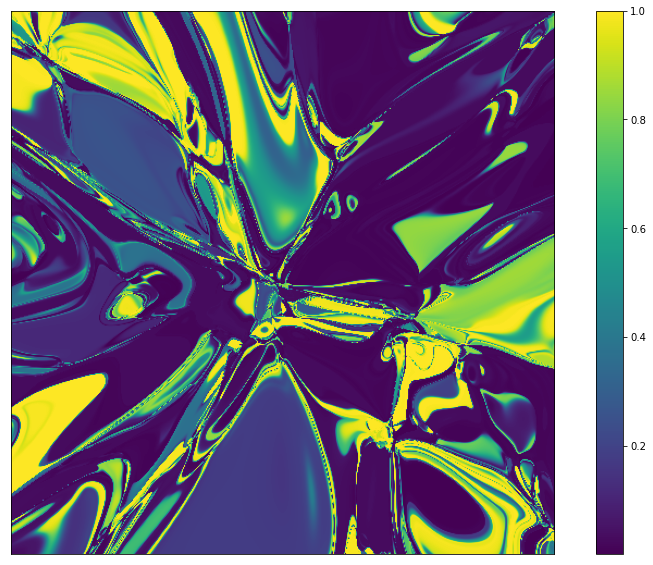

In [8]:
# plot

plt.figure(figsize = (15, 10), facecolor = "white")

plt.imshow(plotmatrix, origin = "lower")
plt.colorbar()

plt.xticks([], [])
plt.yticks([], [])

plt.show()

### Image sources

Fully connected neural network:    
https://www.researchgate.net/profile/Daniele-Grattarola/publication/323218981/figure/fig4/AS:594583624884224@1518771191418/A-fully-connected-neural-network-with-two-hidden-layers.png

In [5]:
# # making a network with n hidden layers

# layer_count = 20

# # weights and biases used for transition from input layer to first hidden layer
# weights_in = np.random.uniform(low = -10, high = +10, size = (N2, N0))
# bias_in = np.random.uniform(low = -1, high = +1, size = N2)

# # weights and biases used for transition from hidden layer to hidden layer
# weights_hidden = np.random.uniform(low = -10, high = +10, size = (layer_count, N0, N0))
# bias_hidden = np.random.uniform(low = -1, high = +1, size = (layer_count, N0))

# # weights and biases used for transition from last hidden layer to output layer
# weights_out = np.random.uniform(low = -10, high = +10, size = (N2, N0))
# bias_out = np.random.uniform(low = -1, high = +1, size = N2)

# def network(y_in, activation, n):
    
#     y_vals = y_in
    
#     for i in range(n):
#         y_vals = layer(activation, y_vals, weights_hidden[i], bias_hidden[i])
                                
#     return layer(activation, y_vals, weights_out, bias_out)